## Final Ptoject 3: Classification - Ensemble Model
Dikumpulkan sebagai salah satu syarat untuk memenuhi tugas Introduction Python for Data Science

**Anggota Kelompok**
1. Erika Taniya Devi Winckler (PYTN-KS14-020)
2. ANAK AGUNG INTEN CAHYANI DEWI (PYTN-KS14-021)
3. NI NYOMAN SEKAR WANDANI (PYTN-KS14-024)

## Overview
Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 secara global, merenggut sekitar 17,9 juta nyawa setiap tahun, yang merupakan 31% dari semua kematian di seluruh dunia.
Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, pola makan yang tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya dengan menggunakan strategi populasi.

Orang dengan penyakit kardiovaskular atau yang memiliki risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dan penanganan dini di mana model pembelajaran mesin dapat sangat membantu.

## Data Description
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

## Objective
Final Project 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut:
1. Mampu mengetahui presentase angka kematian yang disebabkan oleh penyakit jantung.
2. Mampu mengetahui nilai akurasi pada model pengujian yang digunakan.
3. Mampu mengetahui model yang baik dengan best configuration untuk memprediksi keselamatan pasien dari penyakit jantung.

In [1]:
#Melakukan Install PLOTLY
!pip install plotly

In [2]:
#Menginstal paket xlrd yang terdapat pada conda
!conda install -c anaconda xlrd --yes

'conda' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


## Import Library yang dibutuhkan

In [5]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.linear_model import Ridge,Lasso
from sklearn import model_selection
from sklearn.linear_model import RidgeCV,LassoCV

#to suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Data Loading

## Melakukan Import Dataset

In [6]:
df_c = df_c=pd.read_csv(r'D:\Kuliah (D)\MBKM2023\Hactiv8\PYTN_KampusMerdeka_fp3_Erika Taniya Devi Winckler\dataset\heart_failure_clinical_records_dataset.csv')


                  
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [7]:
#Melihat 5 baris pertama dari dataframe
df_c.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
#melihat 5 baris terakhir dari dataframe
df_c.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [9]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
#Melihat jumlah baris pada data
len(df_c)
print("Dataset ini memiliki jumlah baris sebanyak",len(df_c))

Dataset ini memiliki jumlah baris sebanyak 299


In [11]:
#Melihat jumlah kolom pada data
len(df_c.columns)
print("Dataset ini memiliki jumlah kolom sebanyak",len(df_c.columns))

Dataset ini memiliki jumlah kolom sebanyak 13


In [12]:
df_c.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [13]:
#Menghitung jumlah nilai unik dalam setiap kolom DataFrame dan mengurutkannya secara menurun.
nunique_col = df_c.nunique().sort_values(ascending=False)
nunique_col = pd.DataFrame(nunique_col, columns = ["jumlah"])
nunique_col

,jumlah
creatinine_phosphokinase,208
platelets,176
time,148
age,47
serum_creatinine,40
serum_sodium,27
ejection_fraction,17
anaemia,2
diabetes,2
high_blood_pressure,2


In [14]:
for col in df_c.columns:
    print(col,': ')
    print(df_c[col].value_counts())
    print("  ")
    print("  ")

age : 
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: age, dtype: int64
  
  
anaemia : 
0    170
1    129
Name: anaemia, dtype: int64
  
  
creatinine_phosphokinase : 
582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: creatinine_phosphokinase, Length: 208, dtype: int64
  
  
diabetes : 
0    174
1    125
Name: diabetes, dtype: int64
  
  
ejection_fr

In [15]:
#Menghitung kolom jumlah kemunculan setiap nilai unik dalam suatu kolom
df_c.value_counts()

age   anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  smoking  time  DEATH_EVENT
40.0  0        90                        0         35                 0                    255000.0   1.1               136           1    1        212   0              1
65.0  1        160                       1         20                 0                    327000.0   2.7               116           0    0        8     1              1
               128                       1         30                 1                    297000.0   1.6               136           0    0        20    1              1
               113                       1         60                 1                    203000.0   0.9               140           0    0        94    0              1
               68                        1         60                 1                    304000.0   0.8               140           1    0        79

In [16]:
#Mengidentifikasi nilai-nilai yang kosong atau hilang (NaN) dalam setiap sel
df_c.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [17]:
#Mengecek data duplikat
df_c.duplicated().sum()

0

**Kesimpulan**: berdasarkan hasil pengecekan, tidak terdapat data duplikat

## Exploration Data and Analysis (EDA)

## Membuat histogram dari setiap kolom numerik dalam dataframe untuk melihat distribusi frekuensi

In [18]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [19]:
df_c.shape

(299, 13)

In [20]:
#Melihat statistik data numerik seperti mean, count, standard deviation, maximum , minimum, dan nilai quartile
df_c.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


**Kesimpulan**: Berdasarkan data deskriptif diatas maka dapat disimpulkan

**Parameter Age(Usia)** 
- Rata-rata usia pasien penderita **penyakit jantung** berkisar 60 tahun 
- Usia minimal pasien penderita **penyakit jantung** yaitu 40 tahun 
- Usia maksimal pasien penderita **penyakit jantung** yaitu 95 tahun 

**Parameter Anaemia** 
- Rata-rata nilai pada index anaemia pada pasien penderita **penyakit jantung** berkisar 0.431438
- Nilai anaemia terendah pada pasien  penderita **penyakit jantung** yaitu 0 
- Nilai anaemia tertinggi pada pasien penderita **penyakit jantung** yaitu 1

**Parameter Creatinin Phosphokinase** 
- Rata-rata nilai pada index Creatinin Fosfokinase pada pasien penderita **penyakit jantung** berkisar 581.8394
- Nilai minimal Creatinin Fosfokinase  pada pasien penderita **penyakit jantung** yaitu 23.00 
- Nilai maksimal Creatinin Fosfokinase  pada pasien penderita **penyakit jantung** yaitu 7861

**Parameter Diabetes** 
- Rata-rata nilai pada index Diabetes pada pasien penderita **penyakit jantung** berkisar 0.418 
- Nilai minimal Diabetes pada pasien penderita **penyakit jantung** yaitu 0 
- Nilai maksimal Diabetes pada pasien penderita **penyakit jantung** yaitu 1

**Parameter Ejection Fanction**
- Rata-rata fraksi ejeksi pada pasien penderita **penyakit jantung** berkisar 38.083612
- Fraksi ejeksi terendah pada pasien penderita **penyakit jantung** yaitu 14.00 
- Fraksi ejeksi tertinggi pada pada pasien penderita **penyakit jantung** yaitu 80.00 

**Parameter High Blood Presure** 
- Rata-rata tekanan darah tinggi pada pada pasien penderita **penyakit jantung** berkisar 0.351171 
- Nilai tekanan darah tinggi terendah pada pasien penderita **penyakit jantung** yaitu 0 
- Nilai tekanan darah tinggi tertinggi pada pasien penderita **penyakit jantung** yaitu 1

## Visualisasi Data dengan Histogram

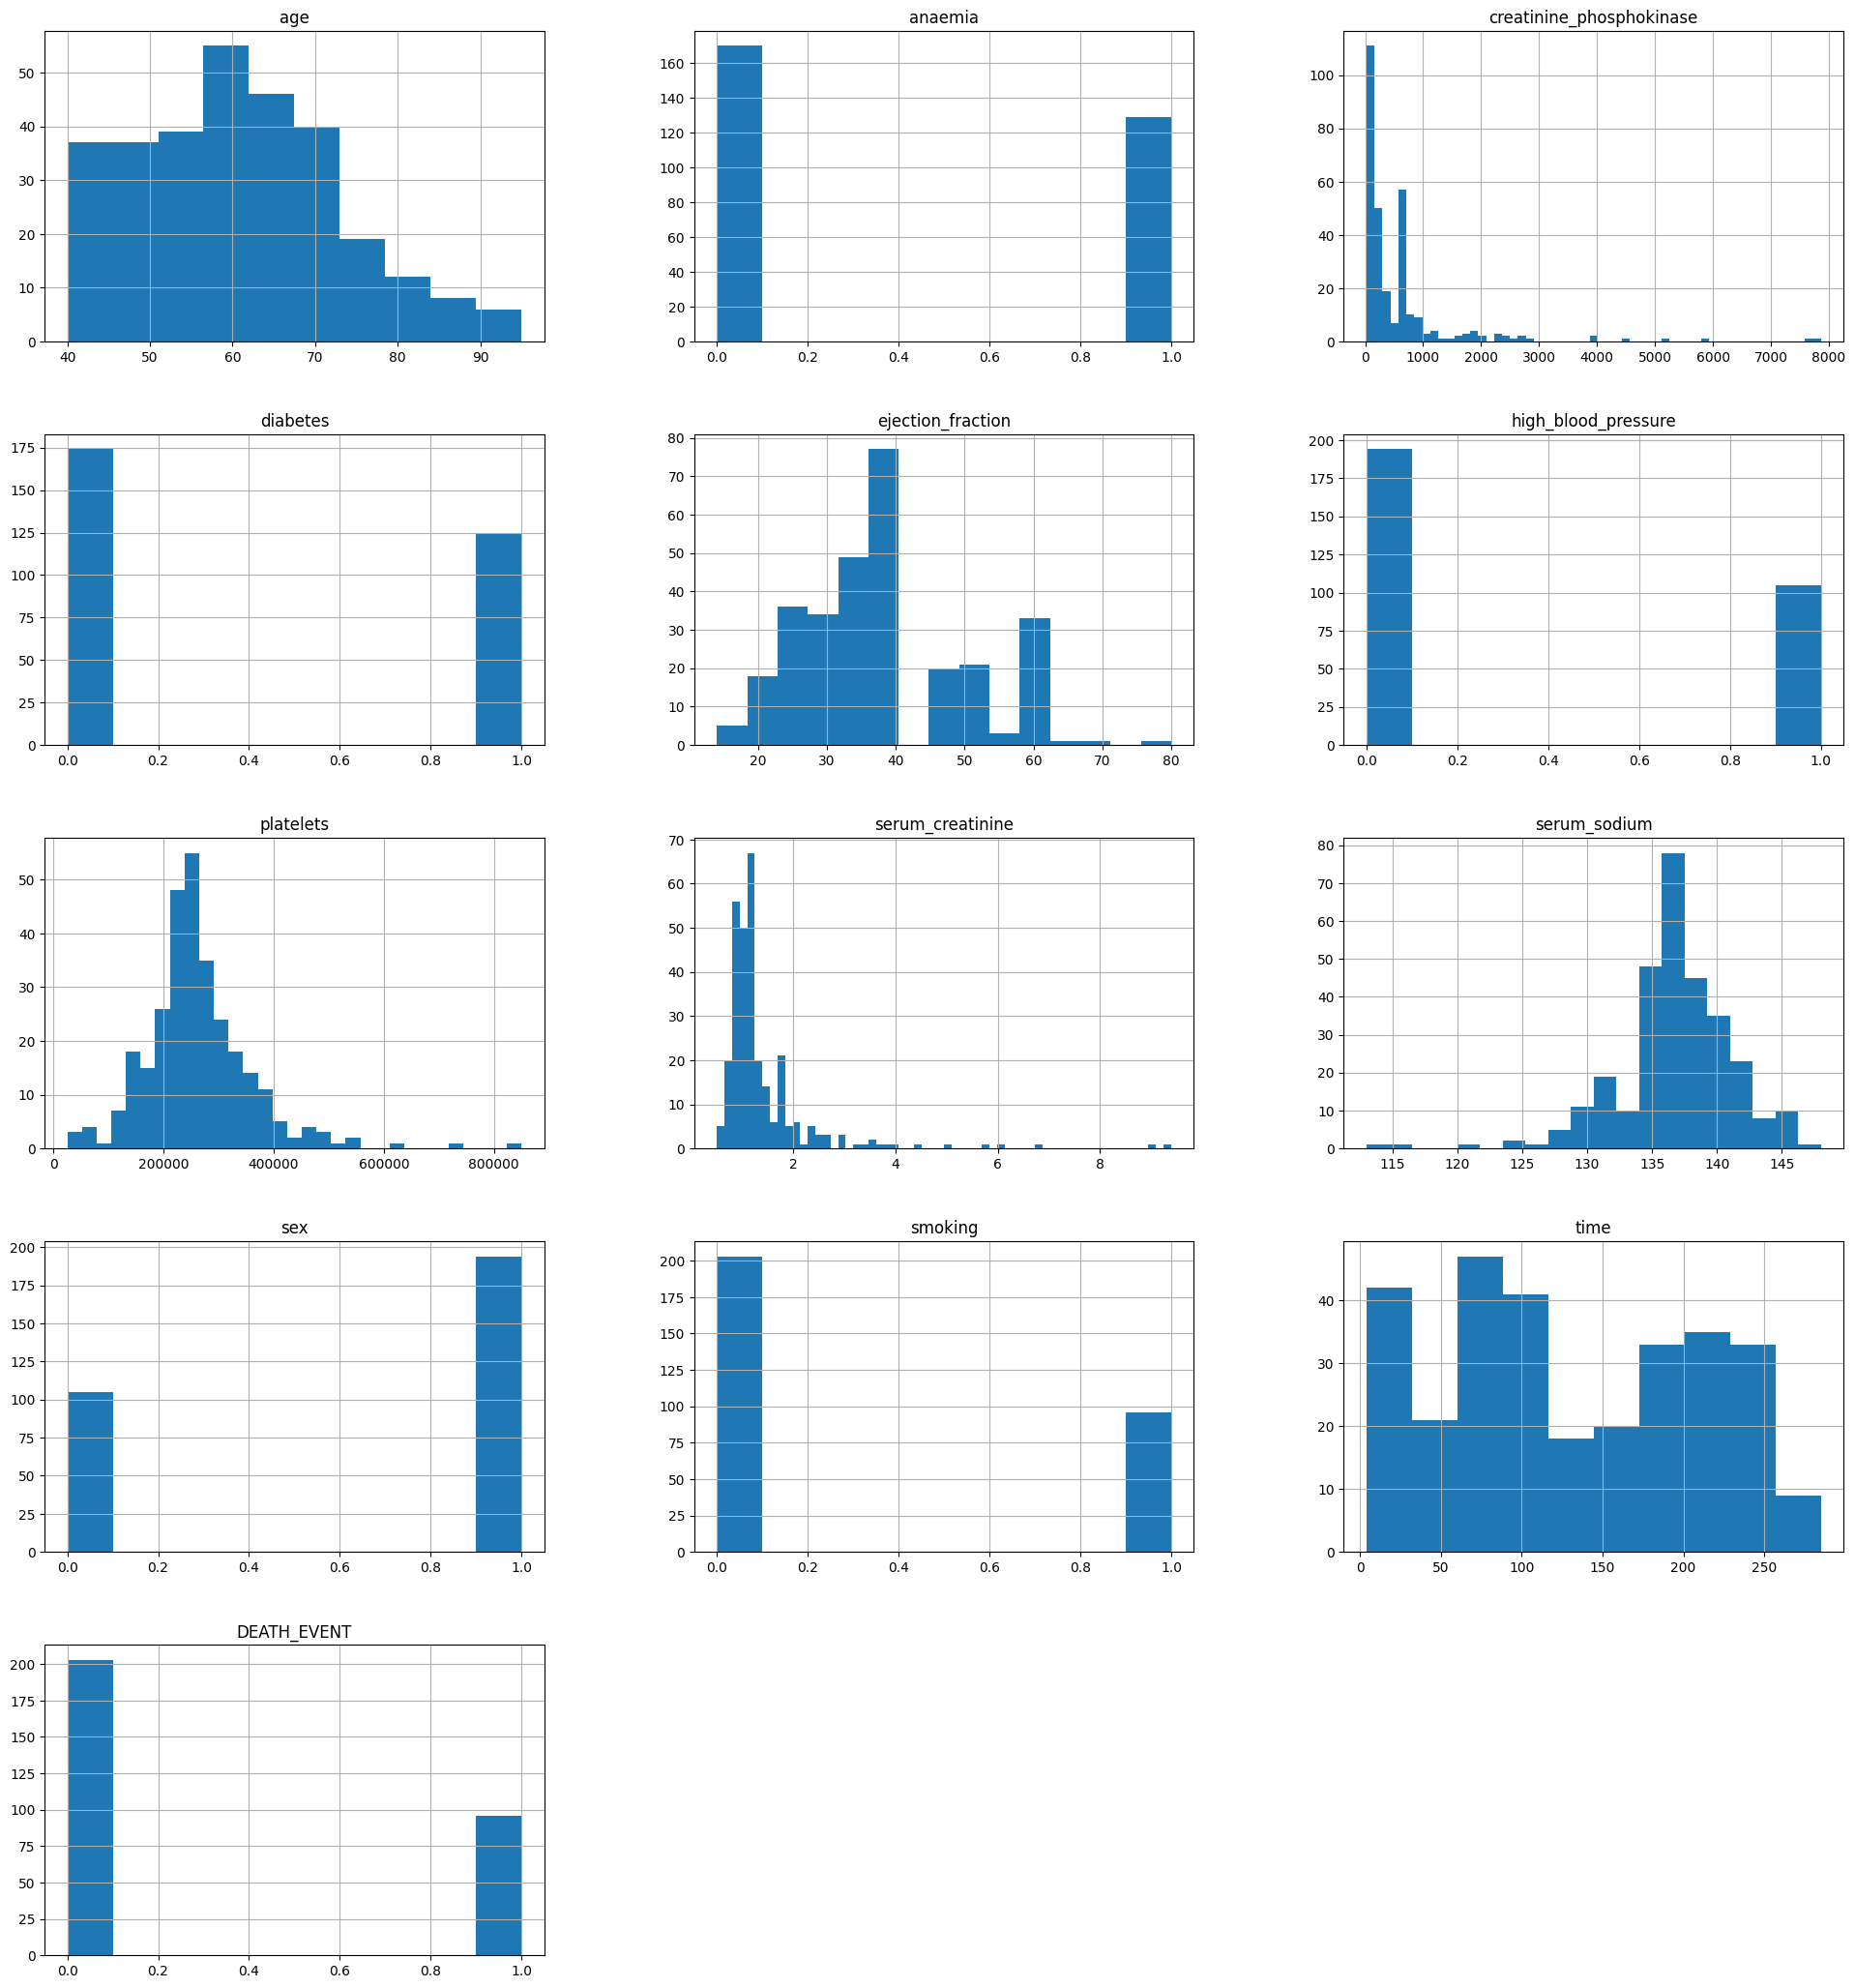

In [21]:
# Melihat distribusi frekuensi
df_c.hist(bins='auto',layout=(15,3), figsize=(24,80));

## Membuat scatter plot dan histogram untuk setiap pasangan kolom numerik dalam dataframe df_c

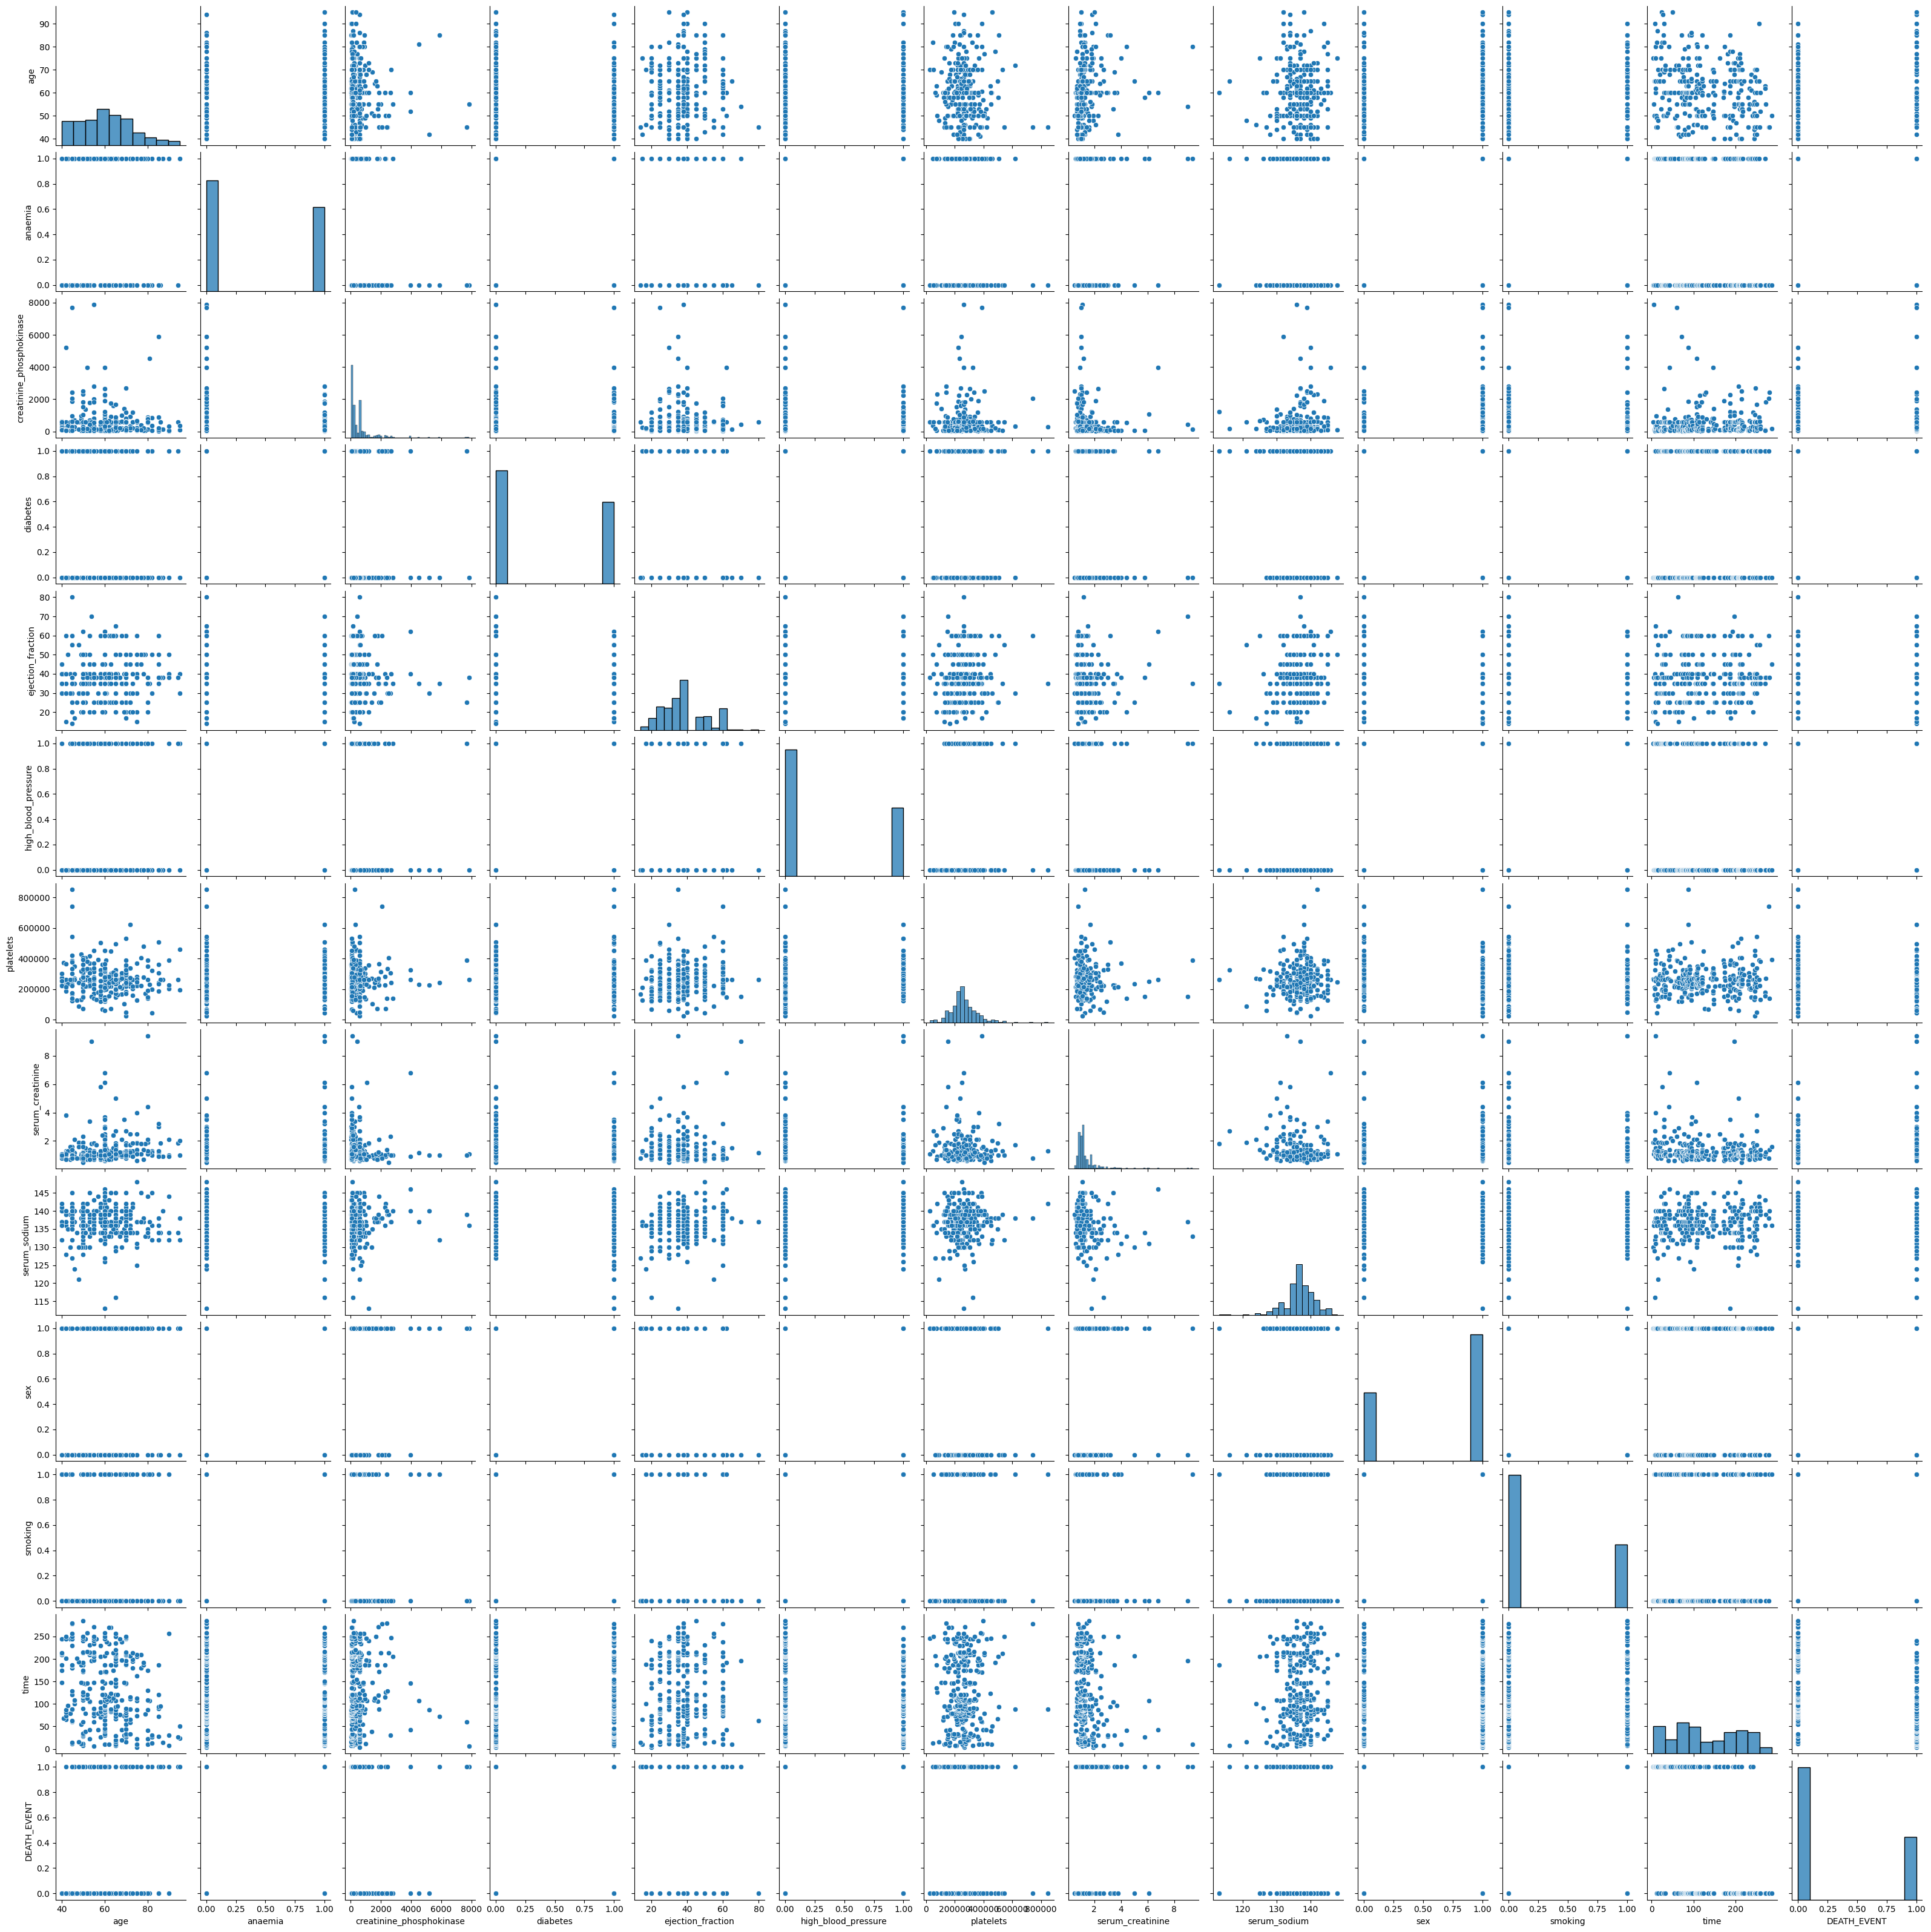

In [22]:
sns.pairplot(df_c)

## Membuat pair plot dengan garis regresi pada scatter plot dan mengatur judul pada figure

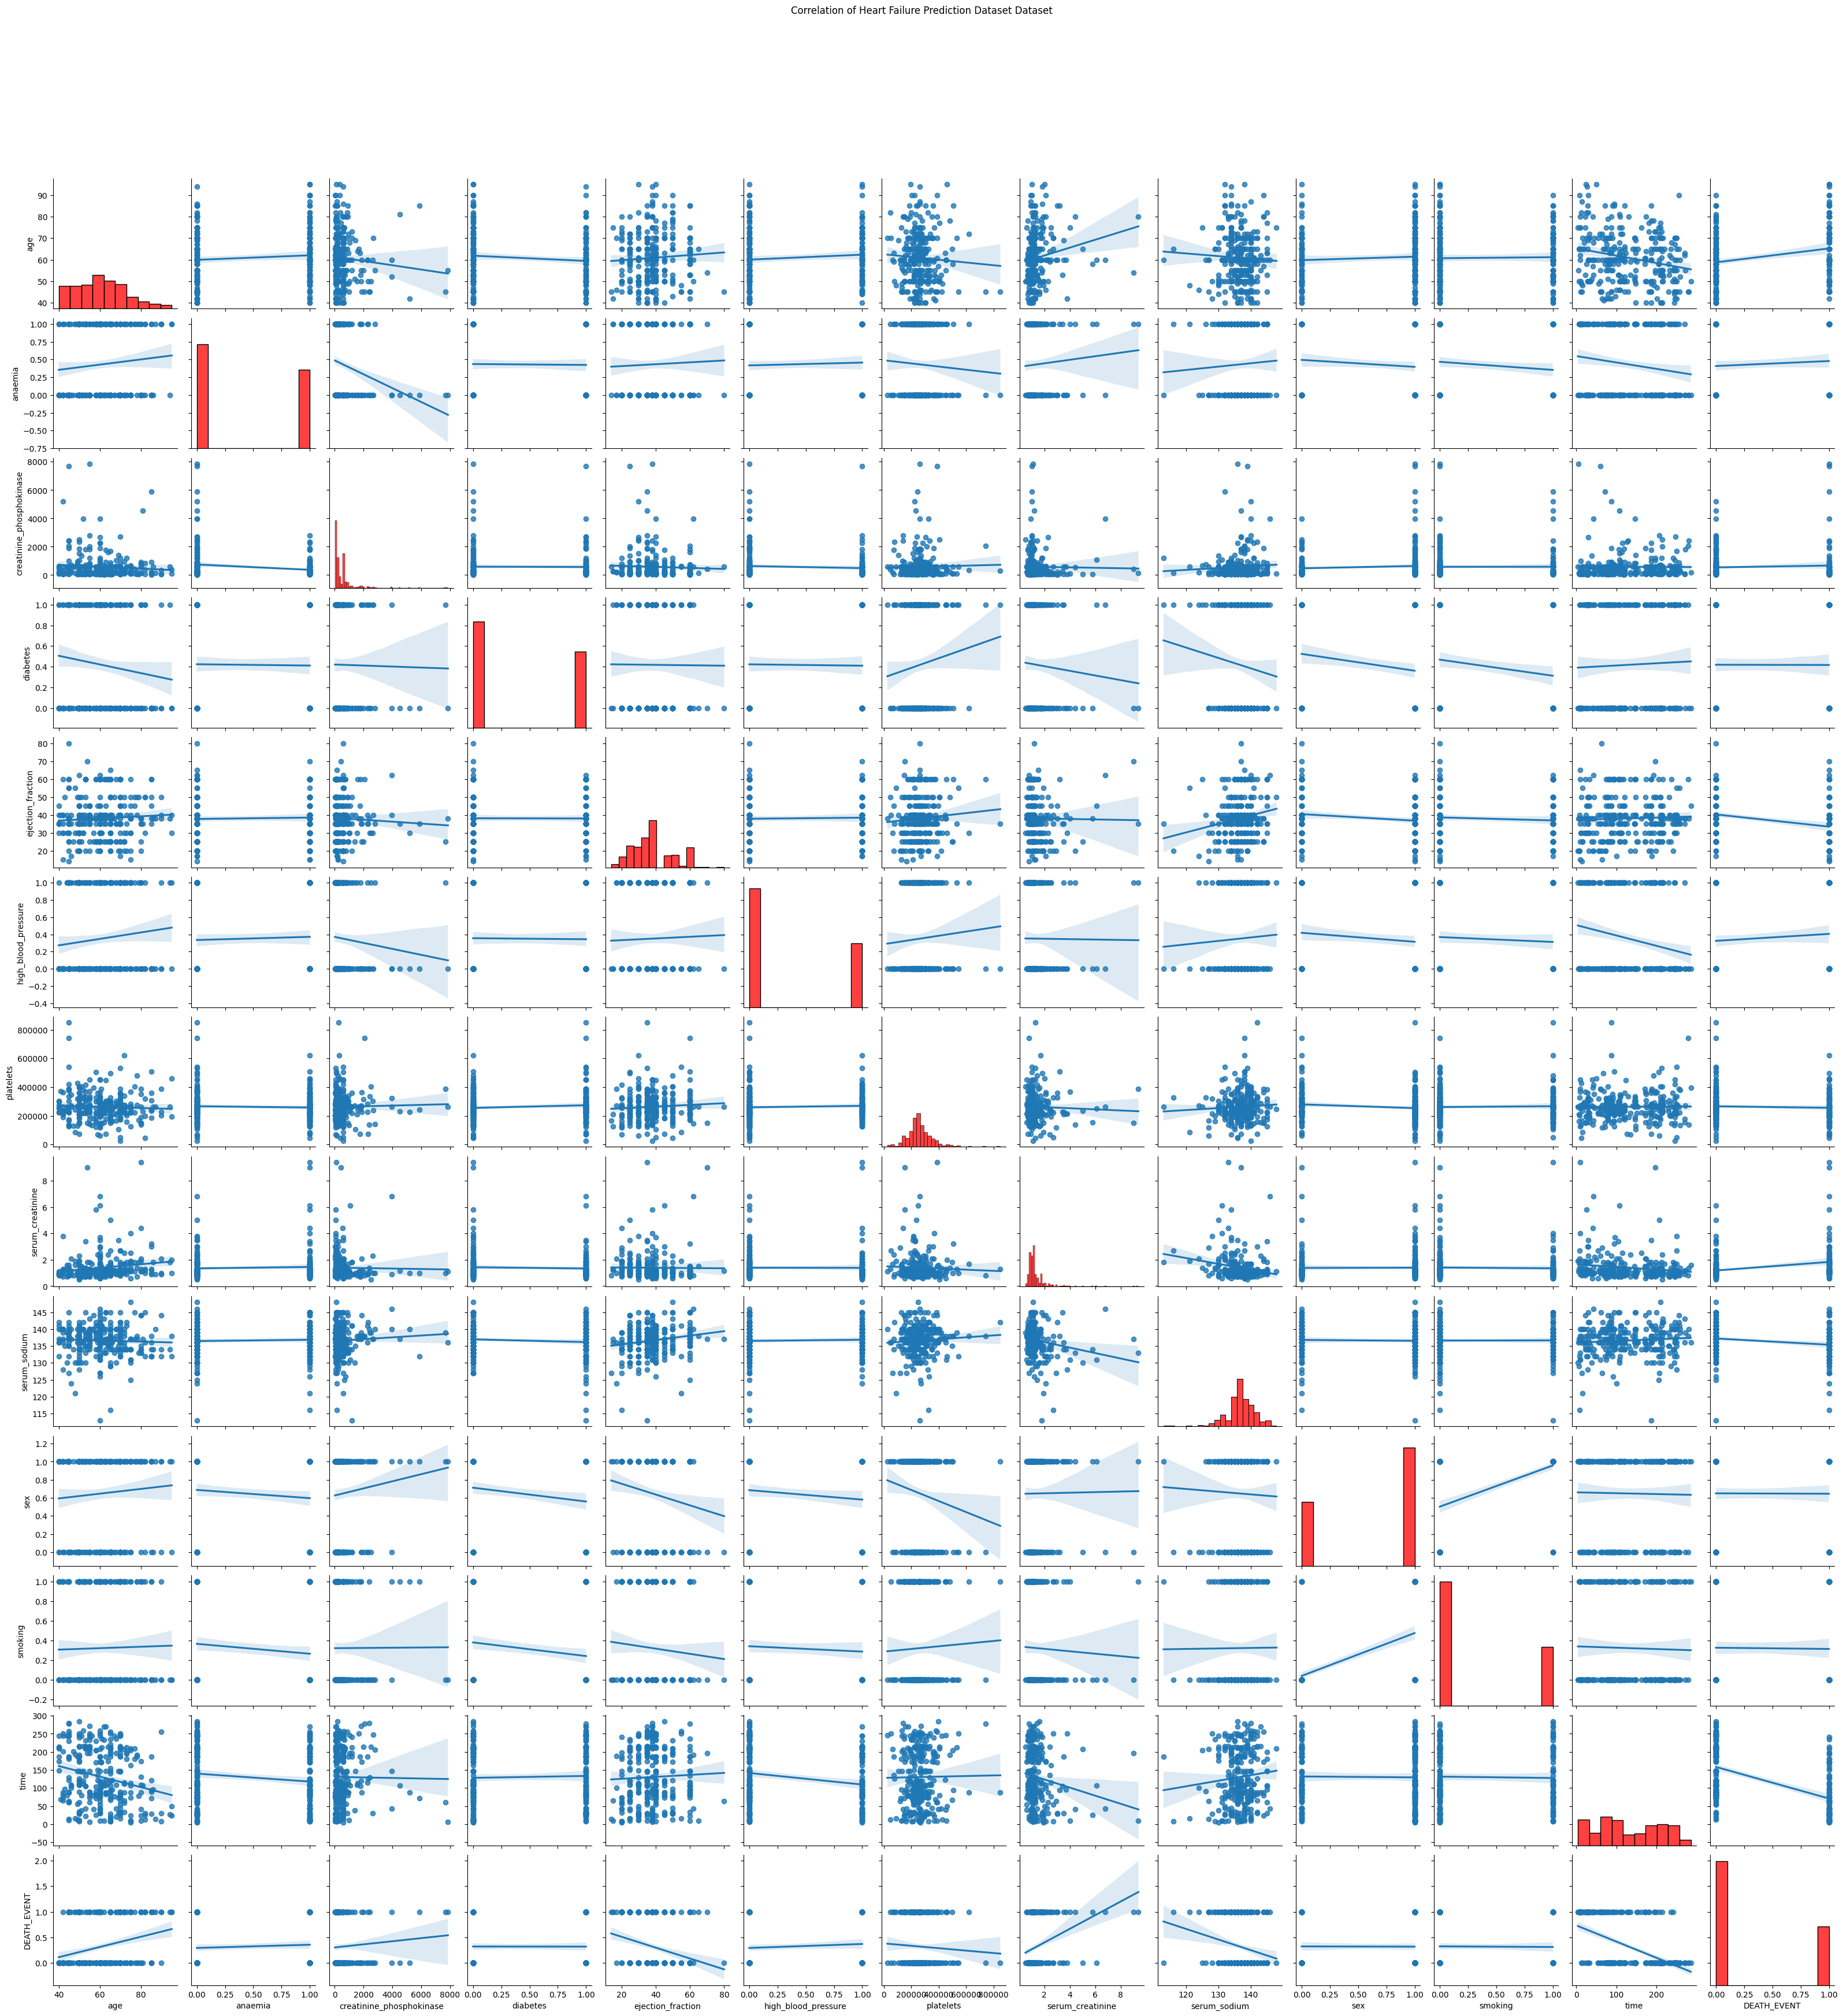

In [23]:
g= sns.pairplot(df_c,kind="reg",diag_kws= {'color': 'red'})

g.fig.suptitle("Correlation of Heart Failure Prediction Dataset Dataset", y=1.08)

plt.show()

## Membuat Visualisasi diagram pie (pie chart) 

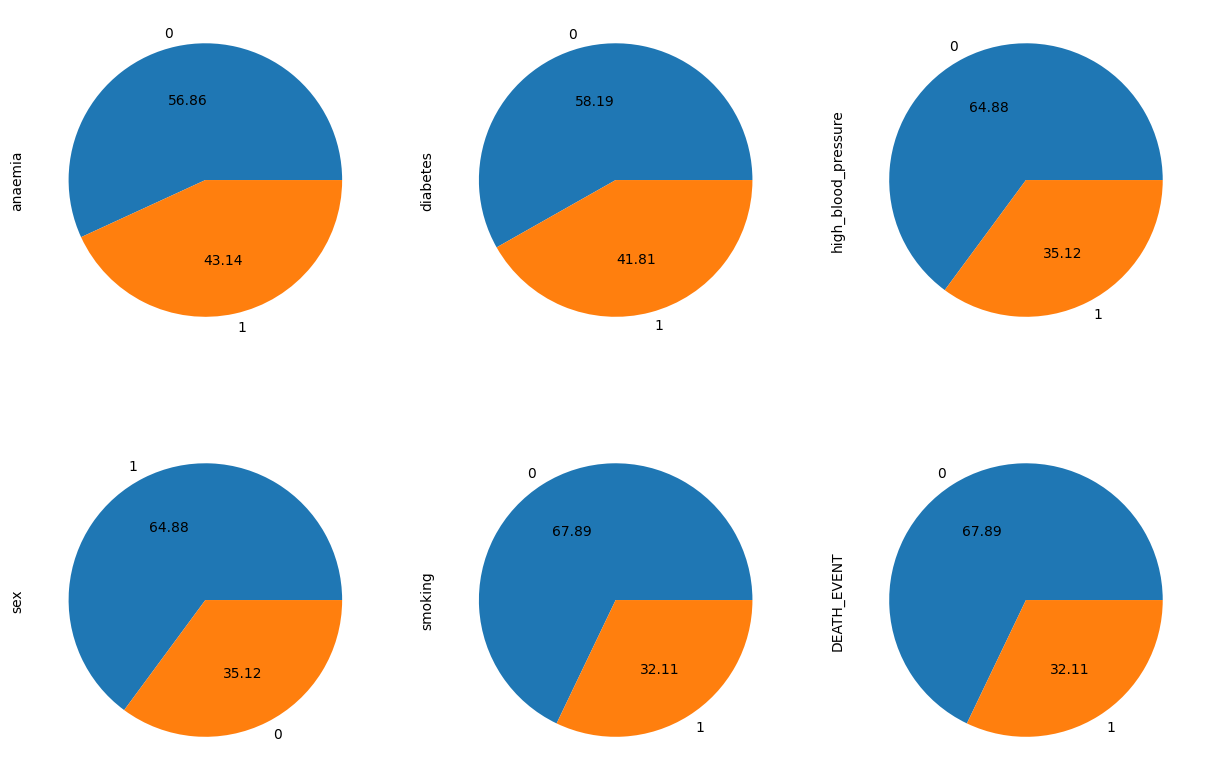

In [24]:
vis_col= [ 'anaemia', 'diabetes','high_blood_pressure', 'sex', 'smoking','DEATH_EVENT']
fig = plt.figure(figsize = (15,10))
j=1
for i in vis_col:
    plt.subplot(2,3,j)
    df_c[i].value_counts().plot(kind ='pie',autopct = '%.2f')
    j=j+1
    
#Save Plot 
plt.savefig("visualisasi_piechart.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

**Kesimpulan:**
Berdasarkan gambar pie chart maka dapat ditarik kesimpulan dengan beberapa asumsi berikut. 
1. Jenis Kelamin - Pria- 64.88 , Wanita- 35.12
2. Diabetes - Tidak = 58.19, Ya = 41.81
3. Anaemia - Tidak = 56.86 , Ya = 43.14
4. Tekanan darah tinggi - Tidak = 64.88, Ya = 35.12
5. Smoking - Tidak = 67.89, Ya = 32.11
6. Kematian - Tidak = 67.89, Ya = 32.11

## Membuat visualisasi antardata dengan correlation heatmap

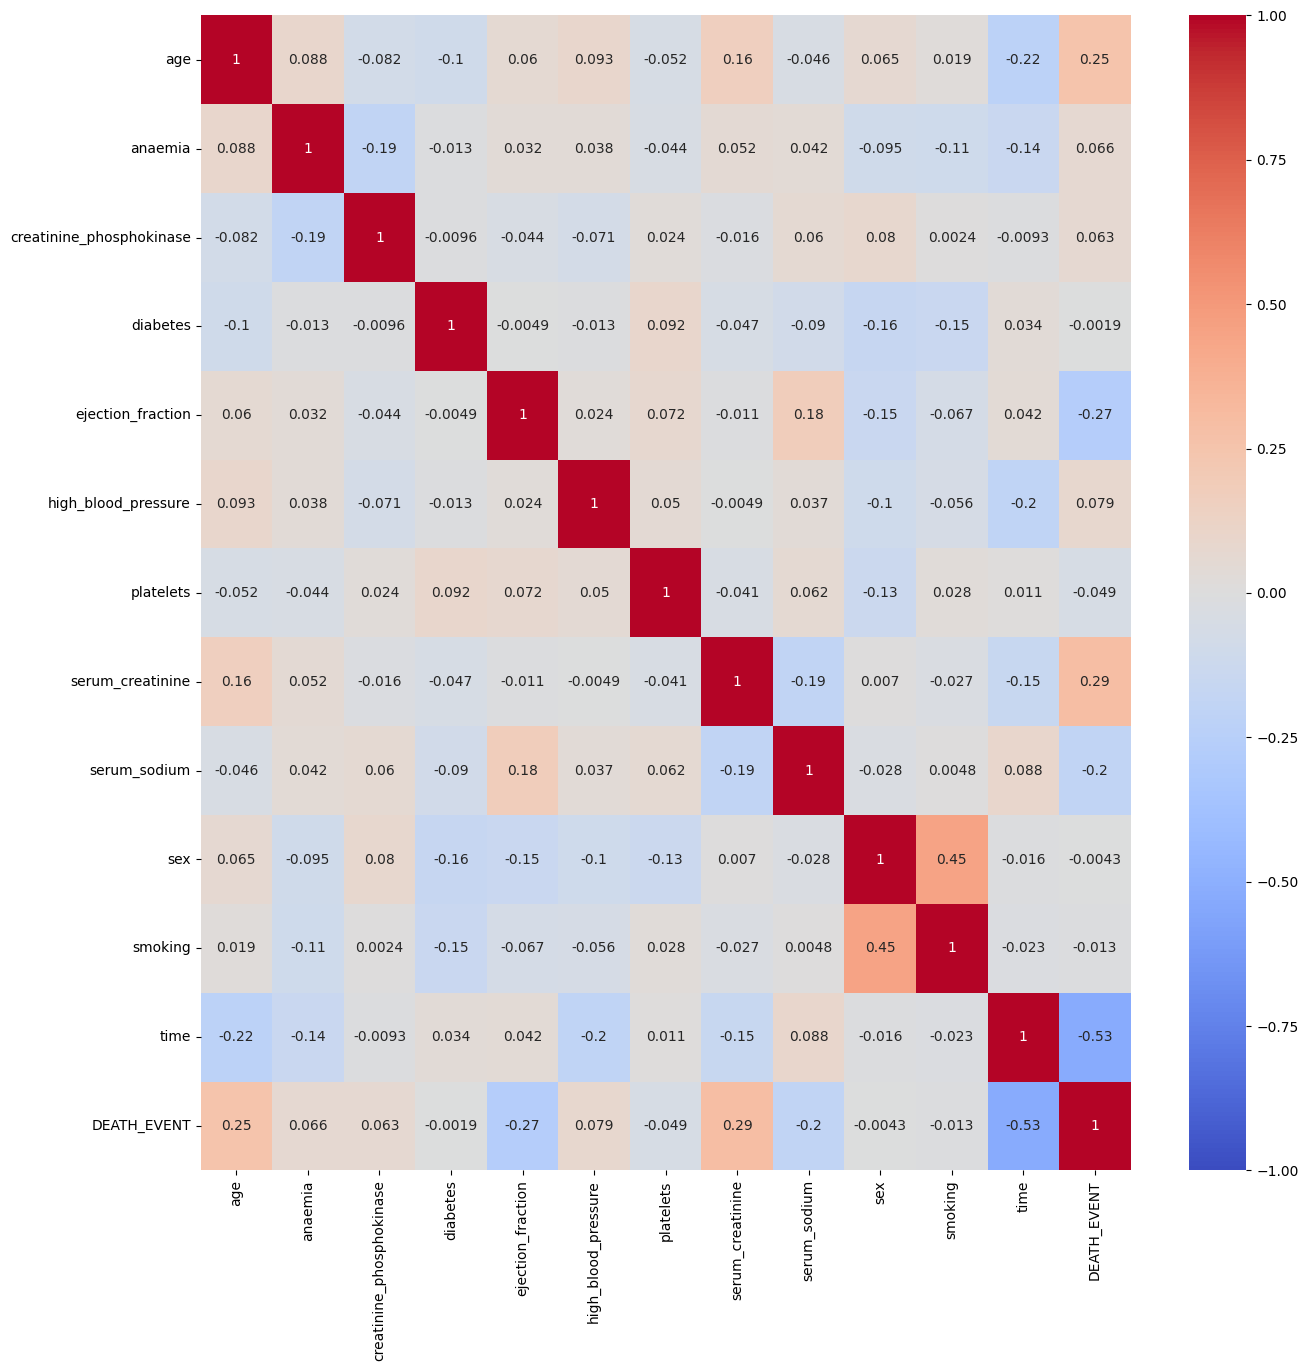

In [25]:
corr = df_c.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

**Kesimpulan**: 
- Berdasarkan matriks korelasi heatmap didapatkan bahwa terdapat parameter yang berkorelasi negatif antara waktu dan kematian. 

## Visualisasi Death Event berdasarkan Age dengan Seaborn Distplot

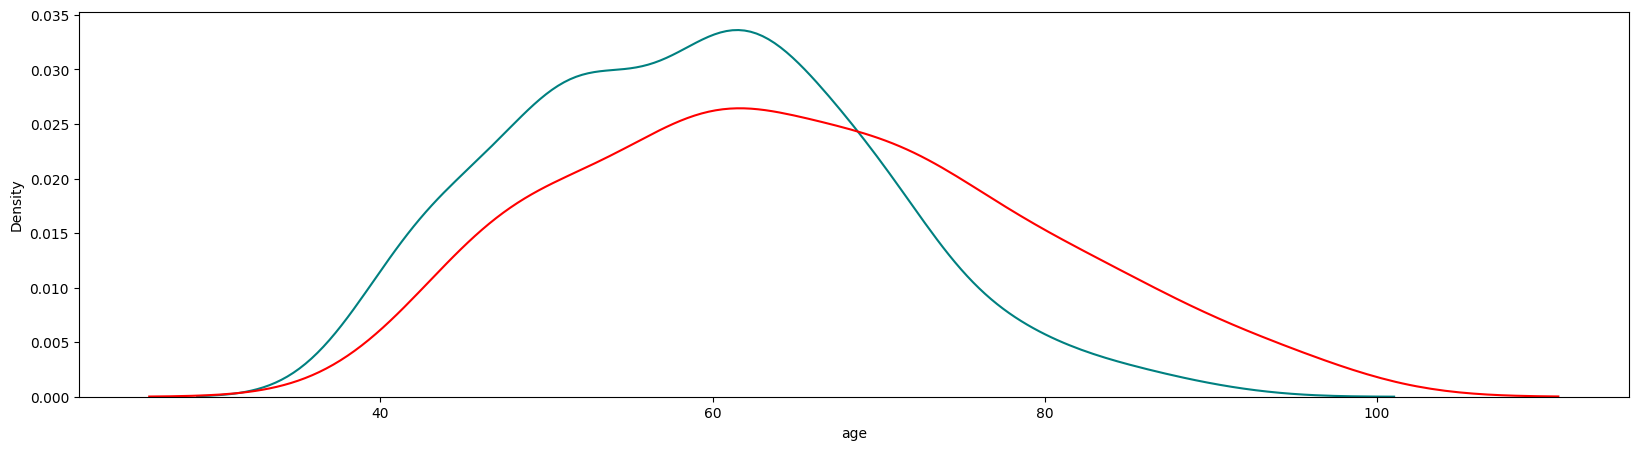

In [26]:
fig = plt.figure(figsize =(20,5))

sns.distplot(df_c[df_c['DEATH_EVENT'] == 0]['age'],hist = False,color = 'teal')

sns.distplot(df_c[df_c['DEATH_EVENT'] == 1]['age'],hist =False, color='red')

#Save Plot 
plt.savefig("visualisasi_kematian_seaborn_distplot.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

**Kesimpulan:** 
Berdasarkan hasil plot grafik di atas yang merupakan distplot dapat disimpulkan bahwa: 
- pada garis yang berwarna merah yang mana merepresentasikan kematian, terlihat  bahwa apabila seseorang berusia diatas 60 tahun akan memiliki peluang yang lebih besar menderita penyakit gagal jantung. 

## Visualisasi kematian berdasarkan smoking dengan Seabborn Distplot

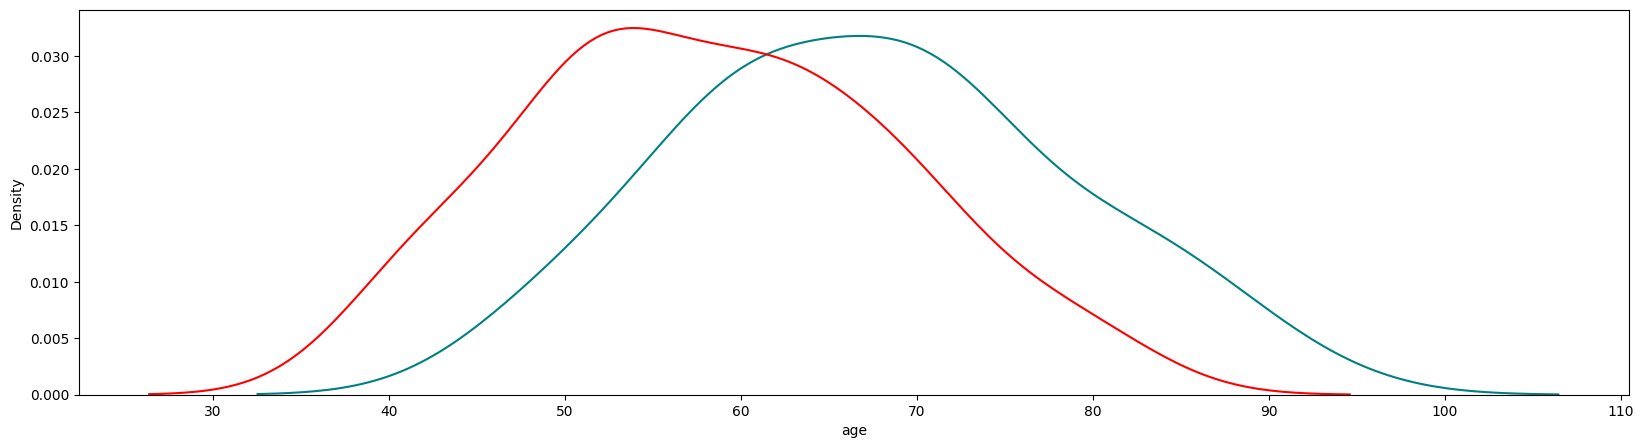

In [27]:
data1 =df_c[df_c['DEATH_EVENT'] == 1] #apabila Ya
data2 =df_c[df_c['DEATH_EVENT'] == 0] #apabila Tidak 

fig = plt.figure(figsize =(20,5))
sns.distplot(data1[data1['smoking'] == 1]['age'],hist = False,color = 'teal')
sns.distplot(data2[data2['smoking'] == 1]['age'],hist =False, color='red')

#Save Plot 
plt.savefig("visualisasi_kematian vs smooking.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

**Kesimpulan:** 
Berdasarkan hasil plot grafik dengan distplot dapat disimpulkan bahwa:
- Seseorang perokok memiliki kemungkinan menderita gagal jantung lebih tinggi dengan usia yang sama dengan non-perokok 

## Visualisasi Death Event berdasarkan Diabetes dengan Seaborn Distplot

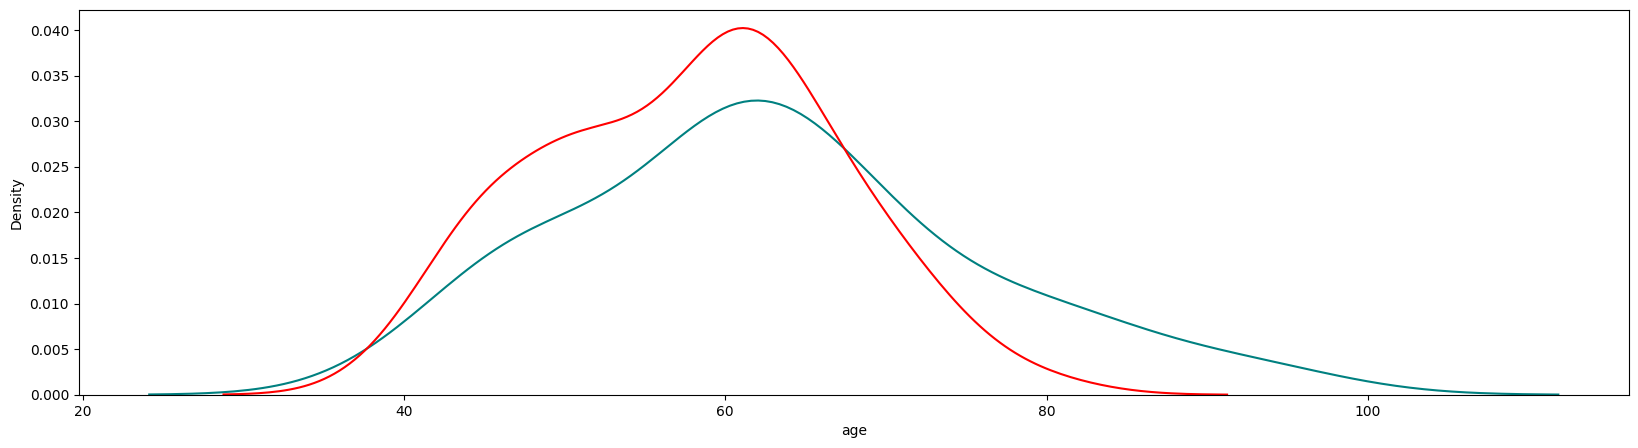

In [28]:
data1 =df_c[df_c['DEATH_EVENT'] == 1]
data2 =df_c[df_c['DEATH_EVENT'] == 0]

fig = plt.figure(figsize =(20,5))
sns.distplot(data1[data1['diabetes'] == 1]['age'],hist = False,color = 'teal')
sns.distplot(data2[data2['diabetes'] == 1]['age'],hist =False, color='red')

#Save Plot 
plt.savefig("visualisasi_kematian vs diabetes.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

**Kesimpulan:** 
Berdasarkan hasil plot grafik dengan distplot dapat disimpulkan bahwa:
- Seseorang penderita diabetes pada usia yang lebih muda kemungkinan untuk terkenal penyakit gagal jantung akan lebih tinggi. 

In [29]:
#Mengambil nilai korelasi antara kolom 'DEATH_EVENT' dengan kolom-kolom lain dalam dataframe df_c yang memiliki korelasi absolut lebih dari 0.1
corr[abs(corr['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

## Data Preprocessing

In [30]:
##Mengecek kemungkinan ditemukannya outliers pada parameter platelets
q1 = df_c['platelets'].quantile(0.25)
q3 = df_c['platelets'].quantile(0.75)
iqr = q3 - q1
mini = q1 - 1.5* iqr
maxi = q3 + 1.5*iqr

print('Nilai IQR maksimum data = ', maxi)
print('Nilai IQR minimum data = ', mini)

df_c['platelets'].max(), maxi

Nilai IQR maksimum data =  440000.0
Nilai IQR minimum data =  76000.0


(850000.0, 440000.0)

In [31]:
nilai_maxi = np.max(df_c)
nilai_mini = np.min(df_c)

print('Nilai maksimum data = ', nilai_maxi)
print('Nilai minimum data = ', nilai_mini)

Nilai maksimum data =  age                             95.0
anaemia                          1.0
creatinine_phosphokinase      7861.0
diabetes                         1.0
ejection_fraction               80.0
high_blood_pressure              1.0
platelets                   850000.0
serum_creatinine                 9.4
serum_sodium                   148.0
sex                              1.0
smoking                          1.0
time                           285.0
DEATH_EVENT                      1.0
dtype: float64
Nilai minimum data =  age                            40.0
anaemia                         0.0
creatinine_phosphokinase       23.0
diabetes                        0.0
ejection_fraction              14.0
high_blood_pressure             0.0
platelets                   25100.0
serum_creatinine                0.5
serum_sodium                  113.0
sex                             0.0
smoking                         0.0
time                            4.0
DEATH_EVENT                

Menghapus Outlier

In [32]:
##Menghandle outlier dengan metode iqr 
outliers = ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']

dc1 = df_c.copy()
for i in outliers:
    q1 = df_c[i].quantile(0.25)
    q3 = df_c[i].quantile(0.75)
    
    iqr  = q3 - q1
    mini = q1 - 1.5* iqr
    maxi = q3 + 1.5*iqr
    

    dc1[i] = np.where(
    dc1[i] > maxi,
    maxi,
    np.where(
        dc1[i] < mini,
        mini,
        dc1[i]
        )
    )

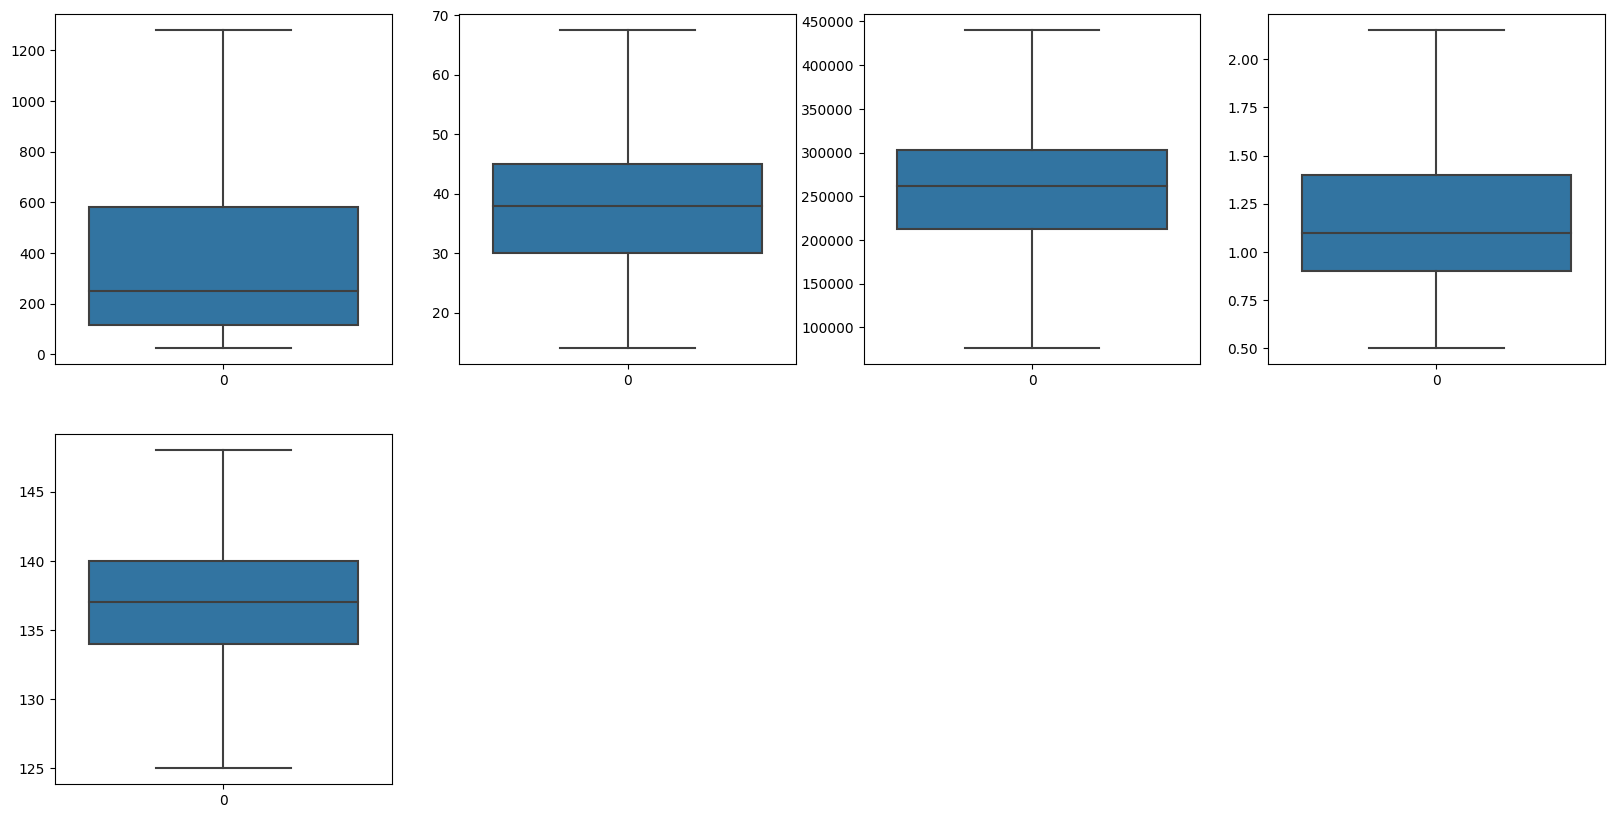

In [33]:
fig = plt.figure(figsize=(20,10))
j=1
for i in outliers:
    plt.subplot(2,4,j)
    sns.boxplot(dc1[i])
    j=j+1

Berdasarkan hasil plot dengan boxplot pada atribut **creatinine phosphokinase, serum sodium, ejection fraction, paltelets, serum creatinine** setelah dilakukan handling outlier, terlihat bahwa sudah **tidak terdapat outlier pada atribut tersebut**.

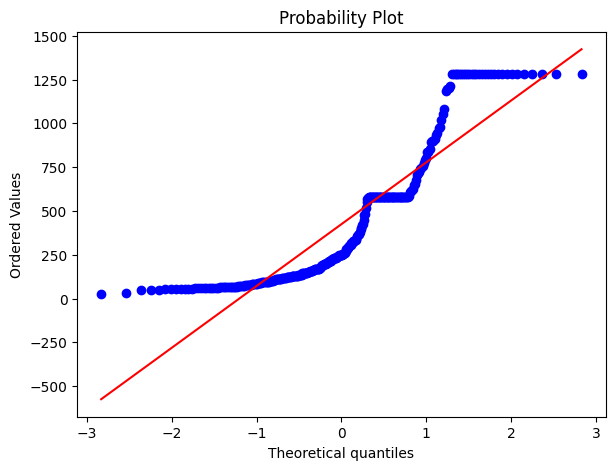

In [34]:
## Ploting Quantile-Quantile Plot (QQ Plot) untuk atribut creatinin fosfokinase
X = dc1['creatinine_phosphokinase']
fig = plt.figure(figsize=(15,5))

plt.subplot(121)
stats.probplot(dc1['creatinine_phosphokinase'], dist ="norm", plot = plt)
plt.show()


In [35]:
trf = FunctionTransformer(func=np.log1p)
X_train_transformed = trf.fit_transform(X)

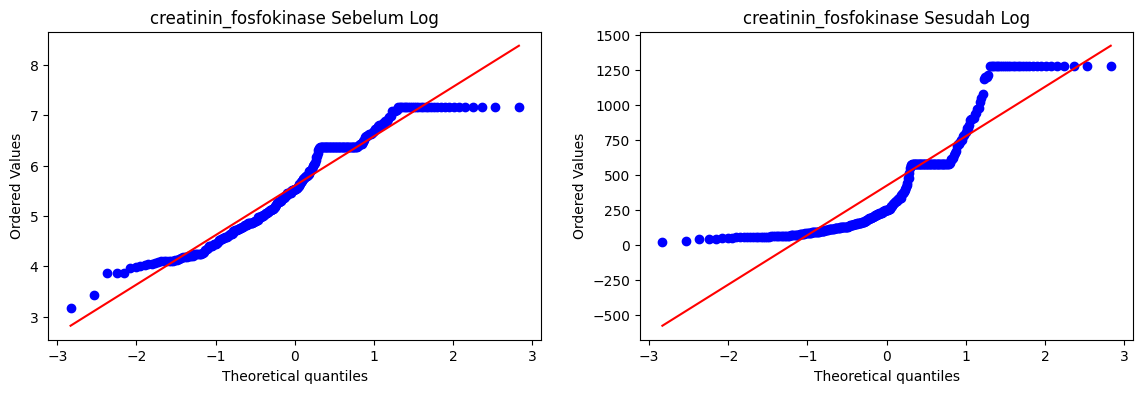

In [36]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train_transformed, dist="norm", plot=plt)
plt.title('creatinin_fosfokinase Sebelum Log')

plt.subplot(122)
stats.probplot(X, dist="norm", plot=plt)
plt.title('creatinin_fosfokinase Sesudah Log')

plt.show()

In [37]:
# Trial and Error revealed that not considering Age column improves accuracy

x = df_c[['ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]
x = (x-x.mean())/x.std()
y = df_c['DEATH_EVENT']

#Spliting data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

In [38]:
# Menghitung dimensi atau ukuran dari x_train dan y_train
print(x_train.shape, y_train.shape)

(239, 4) (239,)


In [39]:
# Menghitung jumlah kemunculan setiap nilai unik x_train dan y_train
print(x_train.value_counts(), y_train.value_counts())

ejection_fraction  serum_creatinine  serum_sodium  time     
-2.034976          -0.574068         -2.181409     -1.497933    1
 0.161928          -0.380740          0.311522      1.323716    1
                   -0.670733          0.764782      0.215671    1
                                                    1.478326    1
                   -0.574068          0.991412      0.731041    1
                                                               ..
-0.260554          -0.477404          0.764782     -1.420627    1
                                                   -0.273930    1
                                      1.218042     -0.054898    1
                   -0.380740         -1.954779     -1.317553    1
 3.541779          -0.206745          0.084892     -0.866605    1
Length: 239, dtype: int64 0    157
1     82
Name: DEATH_EVENT, dtype: int64


## Mengimplementasikan Random Forest Classifier menggunakan scikit-learn

In [40]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           xlabel='Predicted label', ylabel='True label',
           title='Confusion Matrix')
    plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
p3=rfc.predict(x_test)
label_target=[0,1]
accuracy_rf=accuracy_score(y_test,p3)
print("Random Forest Classifier Success Rate :", "{:.2f}%".format(100*accuracy_rf))

Random Forest Classifier Success Rate : 88.33%


In [42]:
from sklearn.metrics import confusion_matrix

cm_rc = confusion_matrix(y_test, p3)

print('Confusion matrix\n\n', cm_rc)

print('\nTrue Positives(TP) = ', cm_rc[0,0])

print('\nTrue Negatives(TN) = ', cm_rc[1,1])

print('\nFalse Positives(FP) = ', cm_rc[0,1])

print('\nFalse Negatives(FN) = ', cm_rc[1,0])

Confusion matrix

 [[42  4]
 [ 3 11]]

True Positives(TP) =  42

True Negatives(TN) =  11

False Positives(FP) =  4

False Negatives(FN) =  3


<AxesSubplot: >

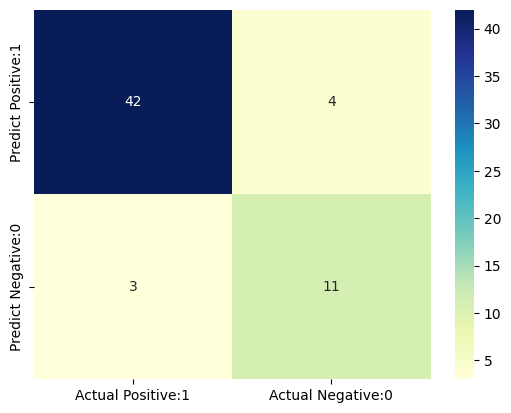

In [43]:
cm_matrix_gnb = pd.DataFrame(data=cm_rc, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_gnb, annot=True, fmt='d', cmap='YlGnBu')

## Mengimplementasikan sebuah Boosting Classifier menggunakan scikit-learn dengan algoritma AdaBoost

In [44]:
from sklearn.ensemble import AdaBoostClassifier
# Inisialisasi model boosting dengan algoritma AdaBoost
boostc = AdaBoostClassifier()

# Latih model menggunakan set pelatihan
boostc.fit(x_train, y_train)

ab=boostc.predict(x_test)
s3=accuracy_score(y_test,ab)
print("Boosting Classifier Success Rate :", "{:.2f}%".format(100*s3))
(boostc, x_test, y_test)


Boosting Classifier Success Rate : 86.67%


(AdaBoostClassifier(),
      ejection_fraction  serum_creatinine  serum_sodium      time
 173          -1.527998         -0.574068      0.538152  0.202787
 287           1.429372         -0.380740     -1.048259  1.542748
 51           -1.527998          0.005916      0.538152 -1.124290
 146          -0.683035         -0.670733     -0.141739 -0.235277
 214          -0.260554         -0.574068     -0.594999  0.821230
 197          -0.683035         -0.574068      0.311522  0.718156
 274          -0.683035         -0.380740      0.084892  1.478326
 62           -0.260554         -0.284076      0.538152 -0.905258
 27            0.584409         -0.090748     -0.141739 -1.343322
 201           1.851853         -0.380740     -0.141739  0.718156
 112          -1.105517          0.199244     -0.141739 -0.518731
 119          -0.007065          0.421572     -0.594999 -0.454309
 11           -1.105517         -0.477404      0.764782 -1.549470
 244          -0.007065          0.392573     -0.5949

In [45]:
from sklearn.metrics import confusion_matrix

cm_ab = confusion_matrix(y_test, p3)

print('Confusion matrix\n\n', cm_ab)

print('\nTrue Positives(TP) = ', cm_ab[0,0])

print('\nTrue Negatives(TN) = ', cm_ab[1,1])

print('\nFalse Positives(FP) = ', cm_ab[0,1])

print('\nFalse Negatives(FN) = ', cm_ab[1,0])

Confusion matrix

 [[42  4]
 [ 3 11]]

True Positives(TP) =  42

True Negatives(TN) =  11

False Positives(FP) =  4

False Negatives(FN) =  3


<AxesSubplot: >

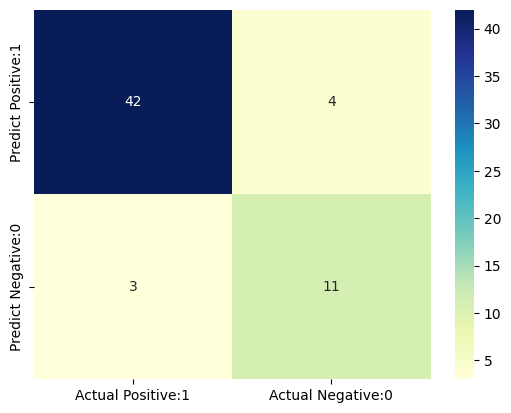

In [46]:
cm_matrix_gnb = pd.DataFrame(data=cm_ab, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_gnb, annot=True, fmt='d', cmap='YlGnBu')

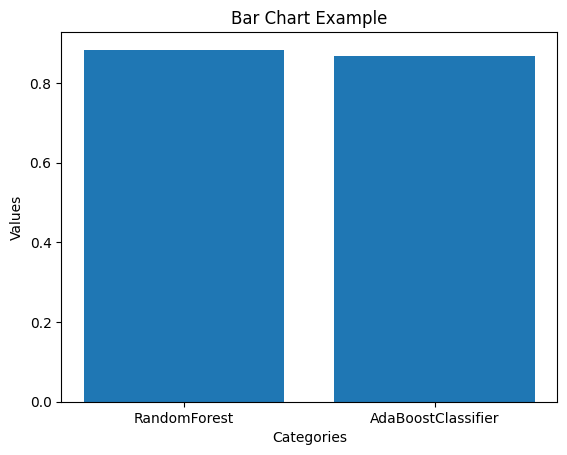

In [47]:
nama_model = ['RandomForest', 'AdaBoostClassifier']
akurasi = [accuracy_rf, s3]

# Membuat plot
plt.bar(nama_model, akurasi)

# Menambahkan label pada sumbu x dan y
plt.xlabel('Categories')
plt.ylabel('Values')

# Menambahkan judul
plt.title('Bar Chart Example')

# Menampilkan plot
plt.show()

In [48]:
from sklearn.model_selection import learning_curve
import numpy as np

# Buat fungsi untuk membuat kurva pembelajaran
def plot_learning_curve(estimator, X, y, train_sizes, cv, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=cv)
    
    # Hitung rata-rata dan standar deviasi dari skor
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Plot kurva pembelajaran
    plt.figure()
    plt.ylim(0.0, 1.1)
    plt.title("Learning Curve" + " "+ title)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
    
    plt.legend(loc="best")
    return plt

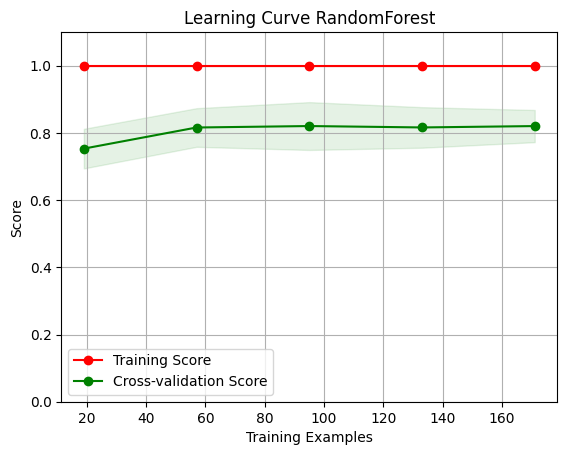

In [49]:
plot_learning_curve(rfc, x_train, y_train, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], cv=5, title='RandomForest')

# Menampilkan kurva pembelajaran
plt.show()

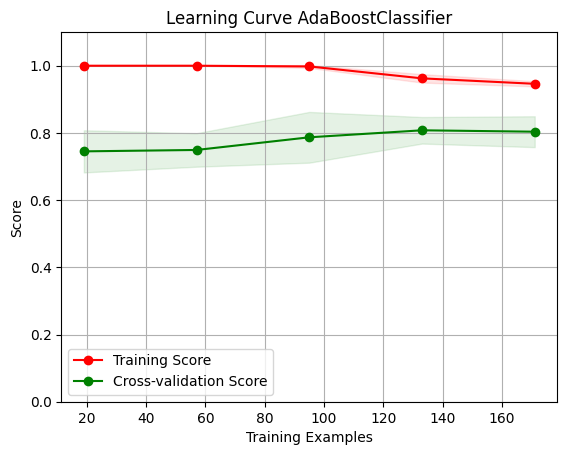

In [50]:
plot_learning_curve(boostc, x_train, y_train, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], cv=5, title='AdaBoostClassifier')

# Menampilkan kurva pembelajaran
plt.show()

In [51]:
import pickle

In [52]:
pickle.dump(rfc,open('model_rfc.pkl','wb'))
pickle.dump(boostc,open('model_boostc.pkl','wb'))

## Kesimpulan :
1. Persentase angka kematian yang disebabkan karena penyakit gagal jantung ialah sebesar **67.89%** yang mana pasien yang meninggal dunia didominasi oleh pasien berjenis kelamin laki-laki.
2. Pada dataset ini dilakukan evaluai model dengan 2 jenis model yaitu Random Forest Classifier dan AdaBoost dengan akurasi sebesar **86.67%**.
3. Model **Random Forest Classifier dan AdaBoost** untuk dataset ini, kedua model ini dipilih sebagai model yang paling tepat untuk memprediksi keselamatan pasien penderita penyakit gagal jantung. 